In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc, sat, smt

In [2]:
def gen_conf_matrix(y: np.ndarray):
    """
    Simple function to generate the configuration matrix for variable number of roads
    """
    num_vers = y.size+1
    num_pathways = num_vers-1

    pathways = []
    for i in range(1,num_vers+1):
        for j in range(1,num_vers+1):
            if i < j:
                pathways += [(i,j)]

    print(pathways)

    return np.array([[ 1 if (p1<=i and i<p2) else 0 for (p1,p2) in pathways] for i in range(1, num_pathways+1)])    

In [3]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
              [0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
              [0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
              [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [4]:
yprime

NameError: name 'yprime' is not defined

In [44]:
num_con = 7
# yprime  = y[:num_con]
yprime  = np.array([int(i/11) for i in y[:num_con]]) 
Aprime  = gen_conf_matrix(yprime)

# y = yprime
# A = Aprime

print(Aprime)
print(yprime)
print([sum(x) for x in Aprime])

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]]
[ 98  91  97 109 105 104 103]
[7, 12, 15, 16, 15, 12, 7]


In [45]:
# always num_bits >= log2(max_int_bv) + 2 (not sure why, possibly due to overflows)
# log, it took an hour and a half to solve (with cmsgen) the roads problem with this y vector np.array([int(i/11) for i in y[:num_con]])  and num_con = 7
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=Aprime,y=yprime,
                                                  num_bits=6,
                                                  max_int_bv=2**4,
                                                  backend='cmsgen',
                                                  num_samples=100)

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 00791438b32bb387e1f6ba7c1b211d7f6595aa06
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -fno-stack-protector -mtune=native -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DNDEBUG -D_FORTIFY_SOURCE=0 -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = ON | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING = ON | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = OFF | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 9.4.0
c executed with command line: cmsgen --samples 100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samples to file: cmsgen_input/cmsgen_samples.out


c Number of samples found until now:     10


c Number of samples found until now:     20


c Number of samples found until now:     30


c Number of samples found until now:     40


c Number of samples found until now:     50


c Number of samples found until now:     60


c Number of samples found until now:     70


c Number of samples found until now:     80


c Number of samples found until now:     90


c Finished generating all 100 samples
c Total time: 5.2e+03 s 


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (28), generating only 20 plots
  warnings.warn(


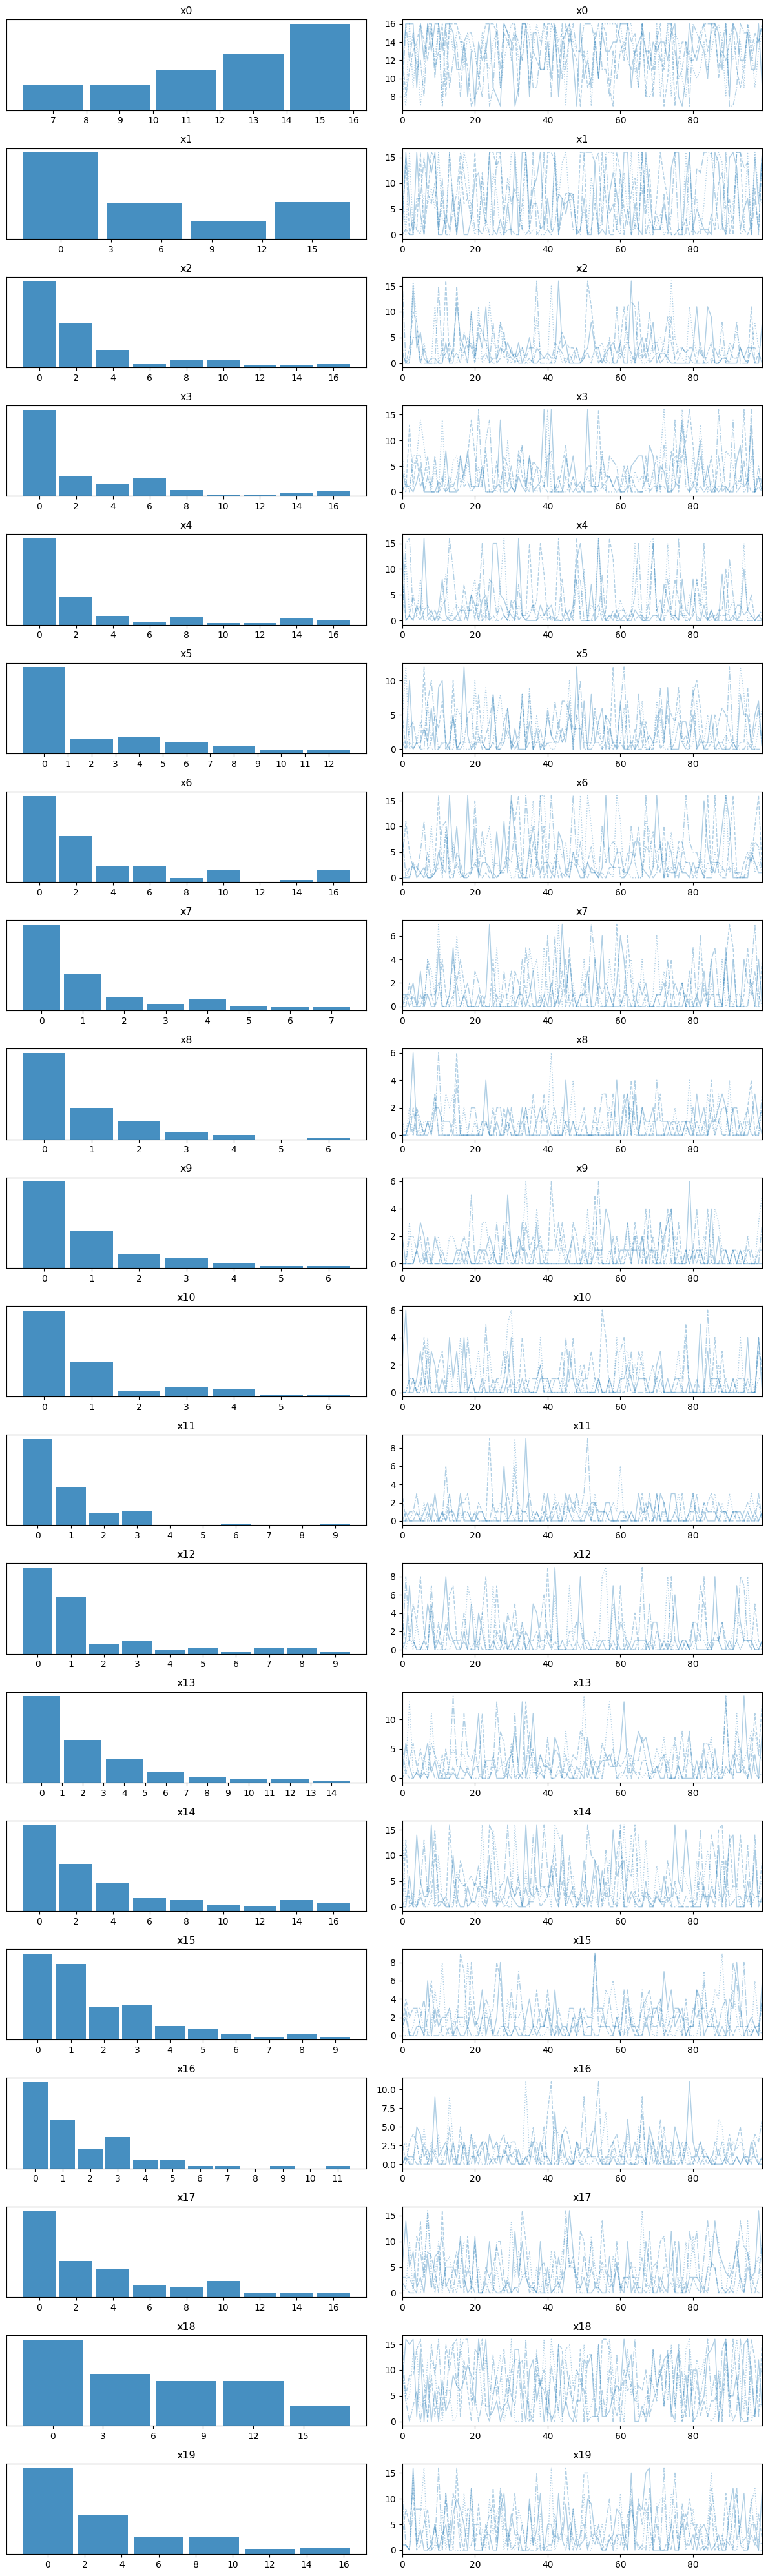

In [46]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [40]:
sum([trace.posterior.sel(chain=0,draw=i)[['x1','x2','x3','x4','x5','x6','x7','x8']].to_array().sum() == 201 for i in range(100)])

<xarray.DataArray ()>
array(100)
Coordinates:
    chain    int64 0

In [47]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,12.88,2.840,8.0,16.0,0.133,0.094,451.0,400.0,1.00
x1,6.40,6.174,0.0,16.0,0.323,0.230,388.0,400.0,1.00
x2,2.74,3.639,0.0,11.0,0.177,0.125,395.0,336.0,0.99
x3,3.10,4.021,0.0,13.0,0.195,0.138,410.0,428.0,1.00
x4,2.78,4.282,0.0,15.0,0.225,0.159,375.0,446.0,1.00
x5,2.47,3.045,0.0,9.0,0.140,0.100,482.0,433.0,1.00
x6,3.63,4.436,0.0,16.0,0.233,0.165,340.0,368.0,1.00
x7,1.19,1.750,0.0,5.0,0.083,0.059,432.0,416.0,1.00
x8,0.78,1.173,0.0,3.0,0.052,0.037,478.0,373.0,1.00
x9,0.83,1.243,0.0,3.0,0.059,0.042,423.0,390.0,0.99


In [8]:
num_vars = Aprime.shape[1]
num_bits = 11 # TODO: use the same variable as for input for the problem
az.to_netcdf(trace, f'roads_SAT_{num_vars}_{num_bits}.nc')

'roads_SAT_6_11.nc'

-------------------------------------------------------

In [13]:
var_names = 'abcdefghijklmnopqrstuvwxyzñäöü'
num_bits=8
max_int_bv=2**7

num_vars = A.shape[1]
num_ys   = y.shape[0]

x = [BitVec(f'x{i}', num_bits) for i in range(num_vars)]
# x = [BitVec('x'+('_'*i), num_bits) for i in range(num_vars)]
# x = [BitVec(var_names[i], num_bits) for i in range(num_vars)]

g = Goal()

sat.add_bool_vars_to_goal(g, x)

for i in range(len(y)):
    vars_ = [x[j] for j in range(num_vars) if A[i][j] == 1]
    g.add(sat.addition_does_not_overflow(vars_))
    g.add(Sum(vars_) == y[i])

for i in range(num_vars):
    g.add(ULE(0, x[i]))
    g.add(ULE(x[i], max_int_bv))  # adding also max
                                  # value to avoid overflows

In [14]:
print(g)

[x00 == (1 == x0 & 1),
 x01 == (2 == x0 & 2),
 x02 == (4 == x0 & 4),
 x03 == (8 == x0 & 8),
 x04 == (16 == x0 & 16),
 x05 == (32 == x0 & 32),
 x06 == (64 == x0 & 64),
 x07 == (128 == x0 & 128),
 x10 == (1 == x1 & 1),
 x11 == (2 == x1 & 2),
 x12 == (4 == x1 & 4),
 x13 == (8 == x1 & 8),
 x14 == (16 == x1 & 16),
 x15 == (32 == x1 & 32),
 x16 == (64 == x1 & 64),
 x17 == (128 == x1 & 128),
 x20 == (1 == x2 & 1),
 x21 == (2 == x2 & 2),
 x22 == (4 == x2 & 4),
 x23 == (8 == x2 & 8),
 x24 == (16 == x2 & 16),
 x25 == (32 == x2 & 32),
 x26 == (64 == x2 & 64),
 x27 == (128 == x2 & 128),
 x30 == (1 == x3 & 1),
 x31 == (2 == x3 & 2),
 x32 == (4 == x3 & 4),
 x33 == (8 == x3 & 8),
 x34 == (16 == x3 & 16),
 x35 == (32 == x3 & 32),
 x36 == (64 == x3 & 64),
 x37 == (128 == x3 & 128),
 x40 == (1 == x4 & 1),
 x41 == (2 == x4 & 2),
 x42 == (4 == x4 & 4),
 x43 == (8 == x4 & 8),
 x44 == (16 == x4 & 16),
 x45 == (32 == x4 & 32),
 x46 == (64 == x4 & 64),
 x47 == (128 == x4 & 128),
 x50 == (1 == x5 & 1),
 x51 ==